#     CREDIT CARD FRAUD DETECTION 


## Importing Necessary packages

In [34]:
import math
import joblib
import sklearn 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt


from sklearn.svm import SVC 
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

%matplotlib inline


## Importing the dataset

In [8]:
credit_card = pd.read_csv('creditcard.csv',sep=',')
credit_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:

print(f"Unique values of target variable :- \n {credit_card['Class'].unique()}")


Unique values of target variable :- 
 [0 1]


In [11]:
print(f"Number of samples under each target value :- \n {credit_card['Class'].value_counts()}")

Number of samples under each target value :- 
 0    284315
1       492
Name: Class, dtype: int64


In [12]:
print(f"few values of Amount column :- \n {credit_card['Amount'][0:4]}")


few values of Amount column :- 
 0    149.62
1      2.69
2    378.66
3    123.50
Name: Amount, dtype: float64


## Data preprocessing

In [13]:

from sklearn.preprocessing import StandardScaler
credit_card['norm_amount'] = StandardScaler().fit_transform(
credit_card['Amount'].values.reshape(-1,1))
credit_card = credit_card.drop(['Amount'], axis=1)
print(f"few values of Amount column after applying StandardScaler:- \n {credit_card['norm_amount'][0:4]}")


few values of Amount column after applying StandardScaler:- 
 0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: norm_amount, dtype: float64


## Target class distribution

In [14]:
class_val = credit_card['Class'].value_counts()
print(f"Number of samples for each class :- \n {class_val}")


Number of samples for each class :- 
 0    284315
1       492
Name: Class, dtype: int64


## Separating the data for analysis

In [15]:
legit = credit_card[credit_card.Class == 0]
fraud = credit_card[credit_card.Class == 1]

In [16]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


## Statistical measures of the data

In [17]:
legit_sample = legit.sample(n=28430)

In [18]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
21902,31922.0,-0.753426,1.247695,0.775079,-0.134592,0.089511,-0.050100,0.175073,0.667960,-0.782878,...,-0.161761,-0.546894,0.033454,-0.365348,-0.198180,0.107247,0.129420,0.018544,0,-0.313289
69129,53280.0,-1.476192,0.044456,0.751141,-0.173894,1.952226,-1.413429,0.216272,0.207551,-0.767187,...,0.085299,-0.183776,-0.080951,-0.139636,0.186177,0.223137,-0.010446,0.126805,0,-0.350191
155532,105658.0,1.990731,-0.136324,-0.141207,0.538147,-0.594695,-0.708475,-0.537458,-0.169343,2.584962,...,-0.260821,-0.350890,0.369435,-0.129262,-0.400513,-0.960222,0.036675,-0.033362,0,-0.344753
233900,147746.0,-0.320148,1.284101,0.291352,2.483602,1.272192,-0.687865,1.099052,-0.277169,-1.520834,...,0.355524,0.965325,-0.173074,0.042139,-0.639286,-0.155621,-0.097737,0.087026,0,-0.277426
236271,148740.0,2.058133,-0.087814,-1.103497,0.396041,-0.111202,-1.097596,0.143414,-0.283550,0.601045,...,-0.292289,-0.718843,0.342691,-0.093951,-0.316605,0.206676,-0.070078,-0.062009,0,-0.346073


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.206024
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041818
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.626302
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1,-0.183191


In [21]:
new_dataset['Class'].value_counts()

0    28430
1      492
Name: Class, dtype: int64

## Features and target creations

In [22]:
x = new_dataset.drop(['Class'], axis=1)
y = new_dataset[['Class']]

##  Splitting dataset to train & test dataset

In [28]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21691, 30)
(7231, 30)
(21691, 1)
(7231, 1)


# Random Forest Classifier 


Model training start........
Accuracy of model RandomForest :- 0.9975107177430508
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7115
           1       0.98      0.86      0.92       116

    accuracy                           1.00      7231
   macro avg       0.99      0.93      0.96      7231
weighted avg       1.00      1.00      1.00      7231

AROC score :- 
 0.9308939346208834


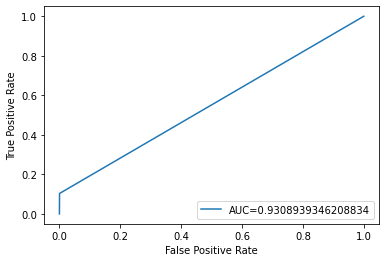

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100)
# train model by using fit method
print("Model training start........")
rf_classifier.fit(X_train, y_train.values.ravel()) 
# predict result using test dataset
y_pred_1 = rf_classifier.predict(X_test)
print(f'Accuracy of model RandomForest :- {accuracy_score(y_test,y_pred_1)}')
print(f"Classification Report :- \n {classification_report(y_test,y_pred_1)}")
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test,y_pred_1)}")
auc = metrics.roc_auc_score(y_test, y_pred_1)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# K-Neighbors Classifier

Model training start........
Accuracy of model using KNN :- 0.985202599917024
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7115
           1       0.80      0.10      0.18       116

    accuracy                           0.99      7231
   macro avg       0.89      0.55      0.59      7231
weighted avg       0.98      0.99      0.98      7231

AROC score :- 
 0.5515133157244286


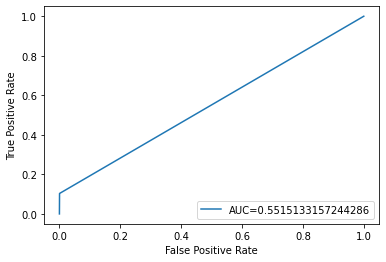

In [48]:
knn_classifier = KNeighborsClassifier()
# train model by using fit method
print("Model training start........")
knn_classifier.fit(X_train, y_train.values.ravel()) 
# predict result using test dataset
y_pred_2 = knn_classifier.predict(X_test)
print(f'Accuracy of model using KNN :- {accuracy_score(y_test,y_pred_2)}')
print(f"Classification Report :- \n {classification_report(y_test,y_pred_2)}")
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test,y_pred_2)}")
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_2)
auc = metrics.roc_auc_score(y_test, y_pred_2)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Support Vector Classifier

Model training start........
Accuracy of model using SVC :- 0.9839579587885493
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7115
           1       0.00      0.00      0.00       116

    accuracy                           0.98      7231
   macro avg       0.49      0.50      0.50      7231
weighted avg       0.97      0.98      0.98      7231

AROC score :- 
 0.5


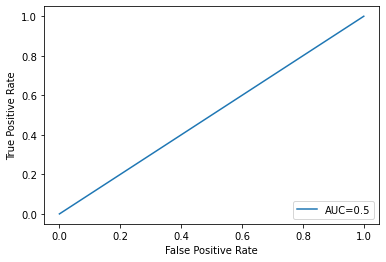

In [47]:
svc_classifier= SVC()
# train model by using fit method
print("Model training start........")
svc_classifier.fit(X_train, y_train.values.ravel()) 
# predict result using test dataset
y_pred_3 = svc_classifier.predict(X_test)
print(f'Accuracy of model using SVC :- {accuracy_score(y_test,y_pred_3)}')
print(f"Classification Report :- \n {classification_report(y_test,y_pred_3,zero_division=0)}")
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test,y_pred_3)}")
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_3,)
auc = metrics.roc_auc_score(y_test, y_pred_3)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree Classifier

Model training start........
Accuracy of model Using Decision Tre :- 0.9935002074401881
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7115
           1       0.76      0.86      0.81       116

    accuracy                           0.99      7231
   macro avg       0.88      0.93      0.90      7231
weighted avg       0.99      0.99      0.99      7231

AROC score :- 
 0.9288559866236944


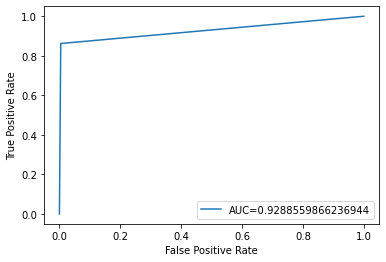

In [46]:
dt_classifier = DecisionTreeClassifier()
# train model by using fit method
print("Model training start........")
dt_classifier.fit(X_train, y_train.values.ravel()) 
# predict result using test dataset
y_pred_4 = dt_classifier.predict(X_test)
print(f'Accuracy of model Using Decision Tre :- {accuracy_score(y_test,y_pred_4)}')
print(f"Classification Report :- \n {classification_report(y_test,y_pred_4,zero_division=0)}")
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test,y_pred_4)}")
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_4,)
auc = metrics.roc_auc_score(y_test, y_pred_4)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Confusion matrix

Random Forest


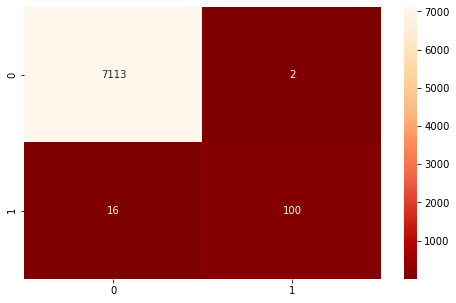

In [55]:
print("Random Forest")
cm1 = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize = (8,5))
sns.heatmap(cm1, annot=True,fmt='d',cmap='OrRd_r')


Support Vector Classifier


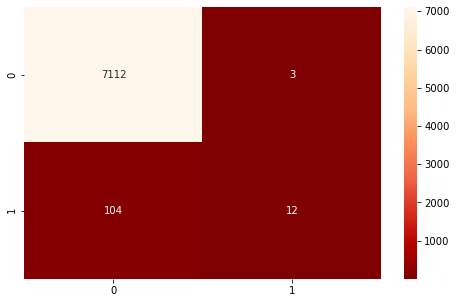

In [56]:
print("K-Nearest Neighbours")
cm2 = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize = (8,5))
sns.heatmap(cm2, annot=True,fmt='d',cmap='OrRd_r')

K-Nearest Neighbours


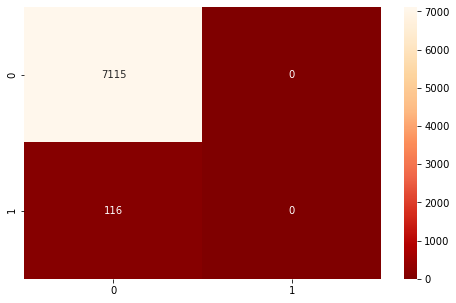

In [57]:
print("Support Vector Classifier")
cm3 = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize = (8,5))
sns.heatmap(cm3, annot=True,fmt='d',cmap='OrRd_r')

Decision Tree


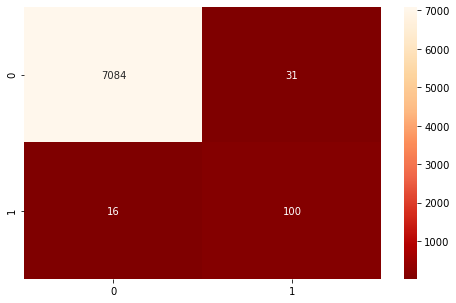

In [58]:
print("Decision Tree")
cm4 = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize = (8,5))
sns.heatmap(cm4, annot=True,fmt='d',cmap='OrRd_r')

## Saving the Model

In [65]:
pickle.dump(rf_classifier, open('model1.pkl', 'wb'))